In [1]:
import pandas as pd
import seaborn as sns
import pickle

path = "C:/Users/pierr/Documents/1_projet_python/Valeur_fonciere/Depot_data/"

In [8]:
#Test sur le csv concat
#url git
url = 'https://github.com/Pioterr/projet_sise_stock/blob/main/concat.zip?raw=true'
#url2 = "C:/Users/pierr/Documents/1_projet_python/Valeur_fonciere/Depot_data/concat_Outlier.csv"
url2 = 'C:/Users/pterron/Documents/projet_python/Application_ml/Depot_data/concat_Outlier.csv'

# Chargez le fichier CSV
#Df = pd.read_csv(filepath_or_buffer= url ,sep='|', compression='zip')
Df = pd.read_csv(filepath_or_buffer= url2 ,sep='|')

C:\Users\pterron\AppData\Local\Temp\ipykernel_15860\3244301178.py:9: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  Df = pd.read_csv(filepath_or_buffer= url2 ,sep='|')


In [4]:
#liste des variables
var = Df.columns
var
"""
0 Date mutation
1 Nature mutation
2 Valeur fonciere
3 Type de voie
4 Code postal
5 Commune
6 Code departement
7 Code commune
8 Nombre de lots
9 Code type local
10 Type local
11 Surface reelle bati
12 Nombre pieces principales
13 Nature culture
14 Surface terrain
"""

'\n0 Date mutation\n1 Nature mutation\n2 Valeur fonciere\n3 Type de voie\n4 Code postal\n5 Commune\n6 Code departement\n7 Code commune\n8 Nombre de lots\n9 Code type local\n10 Type local\n11 Surface reelle bati\n12 Nombre pieces principales\n13 Nature culture\n14 Surface terrain\n'

In [8]:
Df.columns
var

Index(['Date mutation', 'Nature mutation', 'Valeur fonciere', 'Type de voie',
       'Code postal', 'Commune', 'Code departement', 'Code commune',
       'Nombre de lots', 'Code type local', 'Type local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Surface terrain'],
      dtype='object')

In [9]:
var = Df.columns

d_type = {
    'Code commune' : 'str',
    'Valeur fonciere' : 'float',
    'Surface reelle bati' : 'float',
    'Nombre pieces principales' : 'float',
    'Nature culture' : 'bool',
    'Surface terrain' : 'float'
}

df = Df.astype(d_type)
df[var[0]] = pd.to_datetime(df[var[0]], format="%d/%m/%Y")
df[var[[2,12]]] = df[var[[2,12]]].astype('int')

#date
df['month'] = df['Date mutation'].dt.month
df['year'] = df['Date mutation'].dt.year

#On sépare en 4 df

df_m = df[df['Type local'] == 'Maison']
df_a = df[df['Type local'] == 'Appartement']
df_l = df[df['Type local'] == 'Local industriel. commercial ou assimilé']
df_d = df[df['Type local'] == 'Dépendance']

df_am = pd.concat([df_m, df_a], axis=0)
var = df_am.columns


In [10]:
df_am.head()

,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,month,year
0,2018-01-04,Vente,90000,RUE,1380.0,SAINT-CYR-SUR-MENTHON,1,343,0,1.0,Maison,150.0,3,True,347.0,1,2018
3,2018-01-09,Vente,90000,RUE,1380.0,BAGE-DOMMARTIN,1,25,0,1.0,Maison,120.0,3,True,2416.0,1,2018
4,2018-01-12,Vente,130000,RUE,1160.0,VARAMBON,1,430,0,1.0,Maison,80.0,3,True,55.0,1,2018
5,2018-01-16,Vente,224750,RUE,1160.0,PRIAY,1,314,0,1.0,Maison,115.0,5,True,673.0,1,2018
6,2018-01-04,Vente,164370,ALL,1290.0,CORMORANCHE-SUR-SAONE,1,123,0,1.0,Maison,88.0,4,True,419.0,1,2018


,Valeur fonciere,Code postal,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,month,year
Valeur fonciere,1.000000,0.028588,-0.000903,-0.010023,0.069790,0.056358,0.008741,0.010066,0.004164,0.010041
Code postal,0.028588,1.000000,0.086759,0.082195,-0.053456,-0.022010,-0.082540,-0.030670,-0.006130,-0.011611
Nombre de lots,-0.000903,0.086759,1.000000,0.859725,-0.381107,-0.385845,-0.838739,-0.190909,-0.035609,-0.086779
Code type local,-0.010023,0.082195,0.859725,1.000000,-0.492884,-0.507185,-0.966304,-0.220452,-0.031165,-0.067131
Surface reelle bati,0.069790,-0.053456,-0.381107,-0.492884,1.000000,0.777667,0.475618,0.184162,0.010060,0.016780
Nombre pieces principales,0.056358,-0.022010,-0.385845,-0.507185,0.777667,1.000000,0.493035,0.150781,0.008776,0.013199
Nature culture,0.008741,-0.082540,-0.838739,-0.966304,0.475618,0.493035,1.000000,0.186935,0.030015,0.064899
Surface terrain,0.010066,-0.030670,-0.190909,-0.220452,0.184162,0.150781,0.186935,1.000000,0.009198,0.007957
month,0.004164,-0.006130,-0.035609,-0.031165,0.010060,0.008776,0.030015,0.009198,1.000000,-0.040294
year,0.010041,-0.011611,-0.086779,-0.067131,0.016780,0.013199,0.064899,0.007957,-0.040294,1.000000


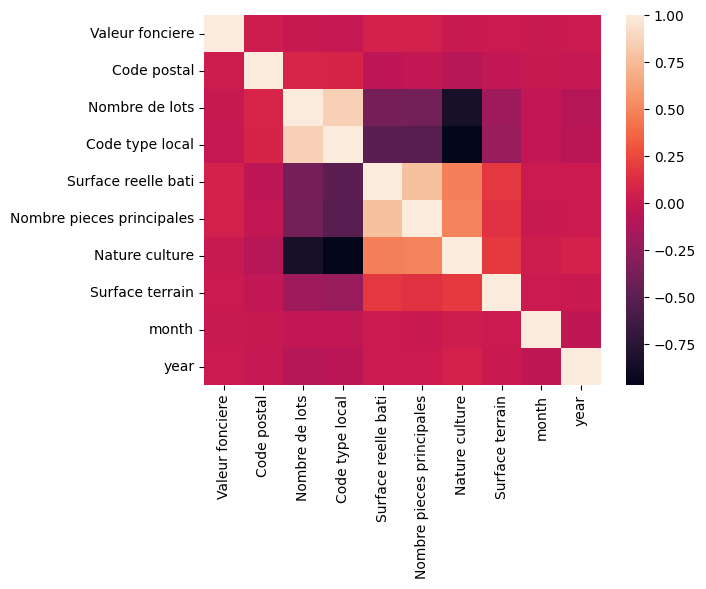

In [22]:
m = df_am.corr(numeric_only=True)
sns.heatmap(m)
m

<Axes: xlabel='Type local', ylabel='Valeur fonciere'>

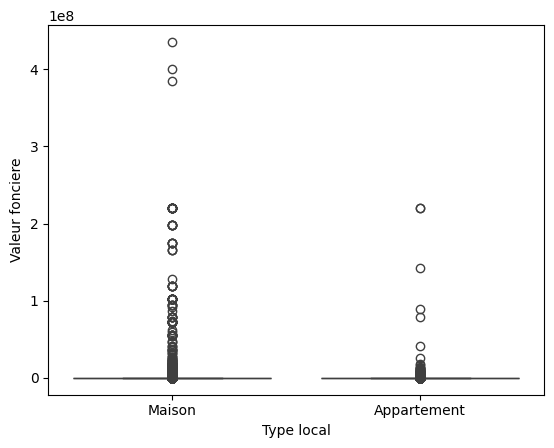

In [23]:
sns.boxplot(df_am, x='Type local', y='Valeur fonciere')

In [24]:
df[var[2]].describe()

count    2.243664e+06
mean     2.310467e+05
std      1.576010e+06
min      0.000000e+00
25%      9.300000e+04
50%      1.600000e+05
75%      2.545000e+05
max      6.295914e+08
Name: Valeur fonciere, dtype: float64

In [39]:
corr = df_no_outliers.corr( numeric_only = True)
corr

,Valeur fonciere,Nombre de lots,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
Valeur fonciere,1.000000,-0.069673,0.054872,0.322026,0.102316,0.048800
Nombre de lots,-0.069673,1.000000,-0.075476,-0.299356,-0.838133,-0.161705
Surface reelle bati,0.054872,-0.075476,1.000000,0.012817,0.086347,0.226034
Nombre pieces principales,0.322026,-0.299356,0.012817,1.000000,0.394728,0.060461
Nature culture,0.102316,-0.838133,0.086347,0.394728,1.000000,0.145261
Surface terrain,0.048800,-0.161705,0.226034,0.060461,0.145261,1.000000


In [51]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243664 entries, 0 to 2243663
Data columns (total 15 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Date mutation              datetime64[ns]
 1   Nature mutation            object        
 2   Valeur fonciere            int32         
 3   Type de voie               object        
 4   Code postal                object        
 5   Commune                    object        
 6   Code departement           object        
 7   Code commune               object        
 8   Nombre de lots             int64         
 9   Code type local            object        
 10  Type local                 object        
 11  Surface reelle bati        float64       
 12  Nombre pieces principales  int32         
 13  Nature culture             bool          
 14  Surface terrain            float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int32(2), int64(1), object(8)
memory usa

,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
0,2018-01-04,Vente,90000,RUE,1380.0,SAINT-CYR-SUR-MENTHON,1,343,0,1.0,Maison,150.0,3,True,347.0
1,2018-01-04,Vente,67000,ALL,1000.0,BOURG-EN-BRESSE,1,53,1,2.0,Appartement,45.0,1,False,0.0
2,2018-01-11,Vente,76200,RUE,1000.0,BOURG-EN-BRESSE,1,53,2,2.0,Appartement,68.0,3,False,0.0
3,2018-01-09,Vente,90000,RUE,1380.0,BAGE-DOMMARTIN,1,25,0,1.0,Maison,120.0,3,True,2416.0
4,2018-01-12,Vente,130000,RUE,1160.0,VARAMBON,1,430,0,1.0,Maison,80.0,3,True,55.0


In [73]:

var1 = var[[1,3,6,10]]
for col in df[var1].columns:
    #Conversion du type de variable en variable catégorique
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

In [75]:
df[var[1]].unique()

array([3, 5, 0, 1, 4, 2], dtype=int8)

In [54]:
corr = df.corr( numeric_only = True)
corr

,Valeur fonciere,Nombre de lots,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
Valeur fonciere,1.000000,-0.006695,0.169517,0.012595,0.010587,0.070750
Nombre de lots,-0.006695,1.000000,-0.054942,-0.279088,-0.833527,-0.131201
Surface reelle bati,0.169517,-0.054942,1.000000,-0.041249,0.060287,0.310816
Nombre pieces principales,0.012595,-0.279088,-0.041249,1.000000,0.376578,0.018581
Nature culture,0.010587,-0.833527,0.060287,0.376578,1.000000,0.114522
Surface terrain,0.070750,-0.131201,0.310816,0.018581,0.114522,1.000000


In [40]:
dff = df.sample(n = 10000)

In [25]:
df_am.shape

(2127918, 17)

# Random forest Valeur foncière

In [83]:
#Random forest

"""
param_grid = {'n_estimators': [50, 100, 200],  # Number of decision trees in the forest
              'max_depth': [5, 10, 20],  # Maximum depth of each tree
              'min_samples_split': [50, 100],  # Minimum samples required to split an internal node
              'min_samples_leaf': [1000, 2000, 4000],  # Minimum samples required to be a leaf node
}
"""


#module
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Variable a tester
var1 = var[[11,12,14,15,16]]
print("Variables utilisé : " + str(var1))

#données de test (Appartement et maison)
Y = df_am['Valeur fonciere']
X = df_am[var1] 

#pretraitement
#X = pd.get_dummies(data=X, columns=var[0])

#Echantillonage
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    random_state = 42)

#modèle
reg_vf = RandomForestRegressor(n_estimators = 100, max_depth= 10, min_samples_split= 10, min_samples_leaf= 50)

#entrainement
reg_vf.fit(X_train, y_train)

#fit
y_pred = reg_vf.predict(X_test)

#prediction
mse = mean_squared_error(y_test, y_pred= y_pred)
r2 = r2_score(y_test, y_pred)

#print
print("MSE : " + str(mse))
print("R² : " + str(r2))


pickle.dump(reg_vf, open('reg_prix.pkl', 'wb'))

Variables utilisé : Index(['Surface reelle bati', 'Nombre pieces principales', 'Surface terrain',
       'month', 'year'],
      dtype='object')
MSE : 7739821253.331776
R² : 0.17673124949154084


# Random forest Valeur foncière CR 

In [62]:
#Random forest CR

#module
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#Variable a tester
var1 = var[[12, 11, 14]]
print("Variables utilisé : " + str(var1))

#données de test
Y = df['Valeur fonciere']
X = df[var1] 

#pretraitement
#X = pd.get_dummies(data=X, columns=var[0])

#Echantillonage
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    random_state = 42)

#CR
varcr = var1
scaler = StandardScaler()
Xtraincr = scaler.fit_transform(X_train[varcr])
X_train_cr = pd.DataFrame(Xtraincr)
X_train[varcr] = X_train_cr

#modèle
reg = RandomForestRegressor(n_estimators = 100, max_depth= 20, min_samples_split= 10, min_samples_leaf= 50)

#entrainement
reg.fit(X_train, y_train)

#fit
Xtestcr = scaler.transform(X_test)
X_test_cr = pd.DataFrame(Xtestcr)
y_pred = reg.predict(X_test_cr)

#prediction
mse = mean_squared_error(y_test, y_pred= y_pred)
r2 = r2_score(y_test, y_pred)

#print
print("MSE : " + str(mse))
print("R² : " + str(r2))

Variables utilisé : Index(['Nombre pieces principales', 'Surface reelle bati', 'Surface terrain'], dtype='object')
RMSE : 8904871070.173874
R² : 0.18703474829719413


# Régression linéaire

In [29]:
#Regression linéaire

#module
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#Variable a tester
var1 = var[[11,12,14,15,16]]
print("Variables utilisé : " + str(var1))

#données de test
Y = df_am['Valeur fonciere']
X = df_am[var1] 

#pretraitement
X = pd.get_dummies(data=X, columns=var[[15,16]])


#Echantillonage
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    random_state = 42)

#Grid search param
param_grid = {
    'fit_intercept': [True, False]
}

#modèle
model = LinearRegression()

#entrainement
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#param
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print('Best param : '+ str(best_params))

#fit
y_pred = best_model.predict(X_test)

#prediction
mse = mean_squared_error(y_test, y_pred= y_pred)
r2 = r2_score(y_test, y_pred)

#print
print("MSE : " + str(mse))
print("R² : " + str(r2))

Variables utilisé : Index(['Surface reelle bati', 'Nombre pieces principales', 'Surface terrain',
       'month', 'year'],
      dtype='object')
Best param : {'fit_intercept': True}
MSE : 731530613746.1062
R² : 0.0075367784657507375


# Ridge

In [50]:
#Ridge linéaire

#module
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#Variable a tester
var1 = var[[11,12,14,15,16]]
print("Variables utilisé : " + str(var1))

#données de test
Y = df_am['Valeur fonciere']
X = df_am[var1] 

#pretraitement
X = pd.get_dummies(data=X, columns=var[[15,16]])
#CR
varcr = var[[11,12,14]]
scaler = StandardScaler()
Xcr = scaler.fit_transform(X[varcr])
pd.DataFrame(Xcr)
X[varcr] = Xcr



#Echantillonage
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    random_state = 42)


#modèle
reg = Ridge()

#
parameters = {'alpha':[1, 2,3,4,5,6,7,8,9,10]}
# define the grid search
Ridge_reg= GridSearchCV(reg, parameters, scoring='neg_mean_squared_error',cv=5)

#entrainement
Ridge_reg.fit(X_train, y_train)

#fit
y_pred = Ridge_reg.best_estimator_.predict(X_test)

#prediction
mse = mean_squared_error(y_test, y_pred= y_pred)
r2 = r2_score(y_test, y_pred)

#print
print("MSE : " + str(mse))
print("R² : " + str(r2))


Variables utilisé : Index(['Surface reelle bati', 'Nombre pieces principales', 'Surface terrain',
       'month', 'year'],
      dtype='object')
MSE : 8205344142.952993
R² : 0.12721454424378476


In [51]:
#### Lasso

#module
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#Variable a tester
var1 = var[[11,12,14,15,16]]
print("Variables utilisé : " + str(var1))

#données de test
Y = df_am['Valeur fonciere']
X = df_am[var1] 

#pretraitement
X = pd.get_dummies(data=X, columns=var[[15,16]])
#CR
varcr = var[[11,12,14]]
scaler = StandardScaler()
Xcr = scaler.fit_transform(X[varcr])
pd.DataFrame(Xcr)
X[varcr] = Xcr



#Echantillonage
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    random_state = 42)


#modèle
reg = Lasso()

#
parameters = {'alpha':[1, 2,3,4,5,6,7,8,9,10]}
# define the grid search
Ridge_reg= GridSearchCV(reg, parameters, scoring='neg_mean_squared_error',cv=5)

#entrainement
Ridge_reg.fit(X_train, y_train)

#fit
y_pred = Ridge_reg.best_estimator_.predict(X_test)

#prediction
mse = mean_squared_error(y_test, y_pred= y_pred)
r2 = r2_score(y_test, y_pred)

#print
print("MSE : " + str(mse))
print("R² : " + str(r2))

Variables utilisé : Index(['Surface reelle bati', 'Nombre pieces principales', 'Surface terrain',
       'month', 'year'],
      dtype='object')
MSE : 8205348595.73996
R² : 0.12721407061006096


In [53]:
#### Elasticnet

#module
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

#Variable a tester
var1 = var[[11,12,14,15,16]]
print("Variables utilisé : " + str(var1))

#données de test
Y = df_am['Valeur fonciere']
X = df_am[var1] 

#pretraitement
X = pd.get_dummies(data=X, columns=var[[15,16]])
#CR
varcr = var[[11,12,14]]
scaler = StandardScaler()
Xcr = scaler.fit_transform(X[varcr])
pd.DataFrame(Xcr)
X[varcr] = Xcr



#Echantillonage
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    random_state = 42)


#modèle
reg = ElasticNet()

#
parameters = {"max_iter": [1, 5, 10],"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],"l1_ratio": np.arange(0.0, 1.0, 0.1)}
# define the grid search
Ridge_reg= GridSearchCV(reg, parameters, scoring='neg_mean_squared_error',cv=5)

#entrainement
Ridge_reg.fit(X_train, y_train)

#fit
y_pred = Ridge_reg.best_estimator_.predict(X_test)

#prediction
mse = mean_squared_error(y_test, y_pred= y_pred)
r2 = r2_score(y_test, y_pred)

#print
print("MSE : " + str(mse))
print("R² : " + str(r2))

Variables utilisé : Index(['Surface reelle bati', 'Nombre pieces principales', 'Surface terrain',
       'month', 'year'],
      dtype='object')


c:\Users\pterron\Documents\projet_python\Application_ml\Machine_Learning\env1\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.317e+15, tolerance: 9.833e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\pterron\Documents\projet_python\Application_ml\Machine_Learning\env1\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.312e+15, tolerance: 9.824e+11 Linear regression models with null weight for th

KeyboardInterrupt: 

In [68]:
import pickle

In [77]:
####random tree

Y = df['Type local']
X = df[['Surface reelle bati', 'Nombre pieces principales']] 

#X  = pd.get_dummies(data=X, columns=['Type de voie'])

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#70% des données pour l’apprentissage
#30% des données pour l'échantillon test
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    random_state = 42)

treemod = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, min_samples_split=50)
treemod = treemod.fit(X_train,y_train)

y_pred = treemod.predict(X_test)


mc = pd.DataFrame(confusion_matrix(y_test,y_pred),
                  columns=['pred_0','pred_1','pred_2','pred_3'],
                  index=['obs_0','obs_1','obs_2','obs_3'])


print(accuracy_score(y_test,y_pred))




0.8032918340119314


In [78]:
pickle.dump(treemod, open('treemodel_local.pkl', 'wb'))